# Практическое задание №4

В файле laptops_na.csv" содержаться следующие переменные:

- `"brand"` : Название бренда ноутбука.
- `"Model"` : Конкретная модель или серия ноутбука.
- `"Price"` : Цена ноутбука в индийских рупиях.
- `"Rating"` : Рейтинг, присвоенный ноутбуку на основе его характеристик.
- `"processor_brand"` : Марка процессора, используемого в ноутбуке.
- `"processor_tier"` : Уровень производительности или категория процессора.
- `"num_cores"` : Количество вычислительных ядер в процессоре.
- `"num_threads"` : Количество потоков, поддерживаемых процессором.
- `"ram_memory"` : Объем оперативной памяти, используемый в ноутбуке.
- `"primary_storage_type"` : Тип основного хранилища (например, HDD, SSD).
- `"primary_storage -apacity"` : Емкость основного хранилища ноутбука.
- `"secondary_storage_type"` : Тип вторичного хранилища, если оно доступно.
- `"secondary_storage_capacity"` : Емкость вторичного хранилища ноутбука.
- `"gpu_brand"` : Марка графического процессора (GPU).
- `"gpu_type"` : Тип графического процессора.
- `"is_touch_screen"` : Указывает, оснащен ли ноутбук функцией сенсорного экрана.
- `"display_size"` : Размер дисплея ноутбука в дюймах.
- `"resolution_width"` : Разрешение по ширине дисплея.
- `"resolution_height"` : Разрешение дисплея по высоте.
- `"OS"` : Установленная на ноутбуке операционная система.
- `"year_of_warranty"` : Срок гарантии, предоставляемой на ноутбук, обычно в годах.



Задания:

    •	Постройте модель множественной линейной регрессии. Зависимая переменная - Price. Выберите не менее 7-ми переменных в качестве независимых. Среди независимых переменных должно быть не менее 2 категориальных.
    
    •	Сформулируйте гипотезы исследования.
    
    •	Напишите уравнение регрессии.
    
    •	Оцените характеристики регрессионной модели в целом.
    
    •	Оцените значимость регрессионных коэффициентов. Сравните их между собой по силе взаимосвязи с зависимой переменной.
    
    •	Подробно интерпретируйте особенности взаимосвязи между каждым из предикторов и зависимой переменной. Это очень важный пункт задания, поскольку именно в нем мы делаем выводы о том, какие факторы и как могут влиять на цену ноутбуков!
    
    •	Проведите диагностику модели. Есть ли в модели выбросы и/или влияющие наблюдения? Чем это может объясняться?
    
    •	Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 13:00 13 ноября.

#**Формулировка гипотез исследования**

______________

**Гипотеза 1: Линейность зависимости.**

**H0 - Между зависимой переменной и предикторами существует линейная зависимость.**

**H1 - Между зависимой переменной и предикторами отсутствует линейная зависимость.**
______________

**Гипотеза 2: Независимость предикторов**

**A0 - Предикторы независимы друг от друга**

**A1 - Предикторы зависят друг от друга**
______________

**Гипотеза 3: Отсутствие мультиколлинеарности.**

**B0: Независимые переменные не имеют сильной линейной корреляции между собой (мультиколлинеарности нет).**

**B0: Независимые переменные имеют сильную линейную корреляцию между собой (мультиколлинеарность присутствует).**
______________

**Гипотеза 4: Гомоскедастичность.**

**C0 - Дисперсия ошибок является постоянной для всех предикторов**

**C1 - Дисперсия ошибок не является постоянной для всех предикторов**

______________

**Гипотеза 5: Нормальность распределения ошибок.**

**D0 - Ошибки модели имеют нормальное распределение.**

**D1 - Ошибки модели не имеют нормальное распределение.**

______________

**Гипотеза 6: Отсутствие автокорреляции ошибок.**

**E0 - Ошибки модели не имеют автокорреляции.**

**E1 - Ошибки модели имеют автокорреляции.**

______________



# **Обработка данных**

In [ ]:
import pandas as pd

laptops_info = pd.read_csv('laptops_na.csv')
laptops_info.tail()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
986,998.0,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990.0,68.0,amd,ryzen 5,6.0,12.0,16.0,...,No secondary storage,0.0,nvidia,dedicated,False,15.6,1920.0,1080.0,windows,1
987,999.0,NaN,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990.0,73.0,intel,core i7,10.0,16.0,16.0,...,No secondary storage,0.0,nvidia,NaN,False,NaN,NaN,1080.0,windows,2
988,1000.0,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990.0,59.0,amd,ryzen 5,4.0,8.0,8.0,...,No secondary storage,0.0,amd,integrated,False,15.6,1920.0,1080.0,windows,1
989,NaN,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990.0,68.0,NaN,ryzen 5,6.0,12.0,16.0,...,No secondary storage,NaN,amd,integrated,False,14.0,2560.0,1600.0,windows,1
990,NaN,hp,HP Chromebook 15a-na0008TU Laptop (Intel Celer...,20990.0,37.0,NaN,celeron,NaN,2.0,4.0,...,No secondary storage,0.0,intel,integrated,NaN,15.6,1366.0,768.0,chrome,1


**Проанализируем для начала датасет, рассмотрим переменные и их количество NaN значений.**

In [ ]:
laptops_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       933 non-null    float64
 1   brand                       944 non-null    object 
 2   Model                       946 non-null    object 
 3   Price                       942 non-null    float64
 4   Rating                      936 non-null    float64
 5   processor_brand             930 non-null    object 
 6   processor_tier              950 non-null    object 
 7   num_cores                   958 non-null    float64
 8   num_threads                 953 non-null    float64
 9   ram_memory                  942 non-null    float64
 10  primary_storage_type        932 non-null    object 
 11  primary_storage_capacity    928 non-null    float64
 12  secondary_storage_type      946 non-null    object 
 13  secondary_storage_capacity  942 non

**Обработаем пропуски коллонок. Для колонок "num_cores", "num_threads", "ram_memory", "primary_storage_capacity", "second_storage_capacity", "display_size", "resolution_width", "resolution_height", "is_touch_screen", "OS", "year_of_warranty" в качестве меры центральной тенденции используем моду и заполняем ею пропуски.**


In [ ]:
columns_for_mode = [ "num_cores", "num_threads", "ram_memory", "primary_storage_capacity",
                    "secondary_storage_capacity", "display_size", "resolution_width",
                     "resolution_height", "is_touch_screen", "OS", "year_of_warranty"]

for columns in columns_for_mode:
  laptops_info[columns] = laptops_info[columns].fillna(laptops_info[columns].mode()[0])

laptops_info = laptops_info.infer_objects()
print(laptops_info[columns_for_mode].dtypes)
print("\nКоличество пропущенных значений по каждому из столбцов:\n")
print(laptops_info[columns_for_mode].isnull().sum())

num_cores                     float64
num_threads                   float64
ram_memory                    float64
primary_storage_capacity      float64
secondary_storage_capacity    float64
display_size                  float64
resolution_width              float64
resolution_height             float64
is_touch_screen                  bool
OS                             object
year_of_warranty               object
dtype: object

Количество пропущенных значений по каждому из столбцов:

num_cores                     0
num_threads                   0
ram_memory                    0
primary_storage_capacity      0
secondary_storage_capacity    0
display_size                  0
resolution_width              0
resolution_height             0
is_touch_screen               0
OS                            0
year_of_warranty              0
dtype: int64


<ipython-input-3-58b8d8339edf>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  laptops_info[columns] = laptops_info[columns].fillna(laptops_info[columns].mode()[0])


**Для остальных колонок "Price", "Rating" заменим пропущенные значение средним значением по каждой из колонок.**

In [ ]:
columns_for_mean = ['Price', 'Rating']

for column in columns_for_mean:
  laptops_info[column] = laptops_info[column].fillna(laptops_info[column].mean())

laptops_info = laptops_info.infer_objects()
print(laptops_info[columns_for_mean].dtypes)
print("\nКоличество пропущенных значений по каждому из столбцов:\n")
print(laptops_info[columns_for_mean].isnull().sum())


Price     float64
Rating    float64
dtype: object

Количество пропущенных значений по каждому из столбцов:

Price     0
Rating    0
dtype: int64


**Для столбца "year_of_warranty" отдельно заполним ячейки "No information" на моду данного столбца.**

In [ ]:
warranty_mode = laptops_info['year_of_warranty'].mode()[0]
laptops_info['year_of_warranty'] = laptops_info['year_of_warranty'].replace('No information', warranty_mode)

**Также отдельно поработаем со столбцами "is_touch_screen", "OS", "year_of_warranty". Для столбца "is_touch_screen" поменяем True/False на 1/0 соответственно.**

In [ ]:
laptops_info['is_touch_screen'] = laptops_info['is_touch_screen'].map({True: 1, False: 0})

laptops_info['year_of_warranty'] = laptops_info['year_of_warranty'].astype(int)

**Для столбца "OS" выберем метод дамми-переменных.**

In [ ]:
laptops_info['OS'].value_counts()

,count
OS,
windows,929
dos,30
chrome,15
mac,14
other,2
android,1


**Исходя из полученных данных, можем к категории "other" присоединить такие категории: "chrome", "android". Тогда получим, что у нас остается 4 основных категории: "windows", "mac", "dos", "other". В качестве референтного значения примем категорию "other".**

In [ ]:
laptops_info['OS'] = laptops_info['OS'].replace(['android', 'chrome'], 'other')
laptops_info['OS'].value_counts()

,count
OS,
windows,929
dos,30
other,18
mac,14


In [ ]:
laptops_info['OS'] = pd.Categorical(laptops_info['OS'], categories=['other', 'dos', 'mac', 'windows'], ordered=True)
os_dummies = pd.get_dummies(laptops_info['OS'], prefix='OS', prefix_sep='_', drop_first=True, dtype=int)

laptops_info = pd.concat([laptops_info, os_dummies], axis=1)

In [ ]:
laptops_info = laptops_info.drop('OS', axis=1)
laptops_info

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,year_of_warranty,OS_dos,OS_mac,OS_windows
0,1.0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990.0,63.0,intel,core i3,2.0,4.0,16.0,...,intel,integrated,0,15.6,1920.0,1080.0,1,0,0,1
1,2.0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990.0,67.0,intel,core i7,4.0,8.0,16.0,...,intel,integrated,0,15.6,1920.0,1080.0,1,0,0,1
2,3.0,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100.0,73.0,amd,ryzen 5,6.0,12.0,8.0,...,amd,dedicated,0,15.6,1920.0,1080.0,1,0,0,1
3,4.0,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62.0,intel,core i5,12.0,12.0,8.0,...,intel,integrated,0,14.0,1920.0,1080.0,1,0,0,1
4,5.0,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580.0,62.0,amd,ryzen 3,4.0,8.0,8.0,...,amd,integrated,0,15.6,1920.0,1080.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998.0,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990.0,68.0,amd,ryzen 5,6.0,12.0,16.0,...,nvidia,dedicated,0,15.6,1920.0,1080.0,1,0,0,1
987,999.0,NaN,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990.0,73.0,intel,core i7,10.0,16.0,16.0,...,nvidia,NaN,0,15.6,1920.0,1080.0,2,0,0,1
988,1000.0,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990.0,59.0,amd,ryzen 5,4.0,8.0,8.0,...,amd,integrated,0,15.6,1920.0,1080.0,1,0,0,1
989,NaN,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990.0,68.0,NaN,ryzen 5,6.0,12.0,16.0,...,amd,integrated,0,14.0,2560.0,1600.0,1,0,0,1


**Выделим отдельно вышеперечисленные метрические и категориальные переменные в отдельный датасет.**

In [ ]:
corr_val = laptops_info[['Price', 'Rating', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity',
'secondary_storage_capacity', 'is_touch_screen', 'display_size', 'resolution_width', 'resolution_height', 'year_of_warranty', 'OS_dos', 'OS_mac', 'OS_windows']]

corr_val.head()

,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,is_touch_screen,display_size,resolution_width,resolution_height,year_of_warranty,OS_dos,OS_mac,OS_windows
0,23990.0,63.0,2.0,4.0,16.0,512.0,0.0,0,15.6,1920.0,1080.0,1,0,0,1
1,35990.0,67.0,4.0,8.0,16.0,1024.0,0.0,0,15.6,1920.0,1080.0,1,0,0,1
2,51100.0,73.0,6.0,12.0,8.0,512.0,0.0,0,15.6,1920.0,1080.0,1,0,0,1
3,39990.0,62.0,12.0,12.0,8.0,512.0,0.0,0,14.0,1920.0,1080.0,1,0,0,1
4,28580.0,62.0,4.0,8.0,8.0,512.0,0.0,0,15.6,1920.0,1080.0,1,0,0,1


In [ ]:
corr_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       991 non-null    float64
 1   Rating                      991 non-null    float64
 2   num_cores                   991 non-null    float64
 3   num_threads                 991 non-null    float64
 4   ram_memory                  991 non-null    float64
 5   primary_storage_capacity    991 non-null    float64
 6   secondary_storage_capacity  991 non-null    float64
 7   is_touch_screen             991 non-null    int64  
 8   display_size                991 non-null    float64
 9   resolution_width            991 non-null    float64
 10  resolution_height           991 non-null    float64
 11  year_of_warranty            991 non-null    int64  
 12  OS_dos                      991 non-null    int64  
 13  OS_mac                      991 non

**Обработка данных завершена!**

# **Отбор переменных, а также построение модели множественной регрессии.**

**По условию, зависимой переменной является переменная "Price". Для начала выведем список переменных, которые коррелируют с "Price" больше всего.**

In [ ]:
corr_val.corrwith(corr_val['Price'], numeric_only=True).sort_values(ascending=False)

,0
Price,1.000000
num_cores,0.691665
num_threads,0.677696
Rating,0.610751
primary_storage_capacity,0.597115
resolution_width,0.589621
ram_memory,0.578790
resolution_height,0.573566
OS_mac,0.228659
display_size,0.197552


**Исходя из корреляционного анализа, мы можем сделать следующие выводы:**

**1. Переменная num_cores имеет наибольшую корреляцию (0,69) среди всех элементов с зависимой переменной "Price". Это означает, что по большей части, цену ноутбука определяет именно данный параметр, а именно количество ядер процессора. Следом с небольшим отставанием следует переменная "num_threads" (0,68). Можем сказать, что в большинстве случаев, цену ноутбука определяют именно характеристики процессора.**

**2.Также немаловажными параметрами, которые сильно коррелируют с зависимой переменной, являются: "Rating", "primary_storage_capacity", "resolution_width", "ram_memory", "resolution_height". Можно сказать, что на определение цены влияют практически все основные характеристики ноутбука, начиная с рейтинга, заканчивая разрешением экрана.**



**Также построим корреляционную матрицу между переменными**

In [ ]:
corr_val[['Rating', 'num_cores', 'num_threads', 'ram_memory',
          'primary_storage_capacity', 'secondary_storage_capacity',
          'is_touch_screen', 'display_size', 'resolution_width',
          'resolution_height', 'year_of_warranty',
          'OS_dos', 'OS_mac', 'OS_windows']].corr()

,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,is_touch_screen,display_size,resolution_width,resolution_height,year_of_warranty,OS_dos,OS_mac,OS_windows
Rating,1.000000,0.561473,0.733781,0.607633,0.549627,0.039445,0.090963,0.330165,0.402751,0.390325,0.181263,-0.137137,-0.119880,0.354599
num_cores,0.561473,1.000000,0.861979,0.542874,0.469655,-0.055577,0.070955,0.176761,0.466909,0.446834,0.112020,-0.097314,0.047433,0.120552
num_threads,0.733781,0.861979,1.000000,0.601668,0.536207,-0.039653,0.025580,0.299956,0.428213,0.414702,0.110247,-0.124995,-0.054840,0.254876
ram_memory,0.607633,0.542874,0.601668,1.000000,0.489986,0.004556,0.103731,0.122435,0.372045,0.377986,0.101702,-0.162948,-0.069439,0.241512
primary_storage_capacity,0.549627,0.469655,0.536207,0.489986,1.000000,0.144035,0.065748,0.213042,0.368292,0.361287,0.115055,-0.068145,-0.025164,0.197399
secondary_storage_capacity,0.039445,-0.055577,-0.039653,0.004556,0.144035,1.000000,-0.015930,0.019769,-0.050397,-0.056946,-0.029019,-0.019359,-0.013116,0.028305
is_touch_screen,0.090963,0.070955,0.025580,0.103731,0.065748,-0.015930,1.000000,-0.332583,0.164239,0.220865,-0.021058,-0.053419,-0.036192,0.032982
display_size,0.330165,0.176761,0.299956,0.122435,0.213042,0.019769,-0.332583,1.000000,0.054402,-0.012430,0.013019,-0.086712,-0.090082,0.206441
resolution_width,0.402751,0.466909,0.428213,0.372045,0.368292,-0.050397,0.164239,0.054402,1.000000,0.764303,0.034553,-0.097138,0.319018,-0.036236
resolution_height,0.390325,0.446834,0.414702,0.377986,0.361287,-0.056946,0.220865,-0.012430,0.764303,1.000000,0.028920,-0.100511,0.291065,-0.020581


**Заметим, что переменная num_threads сильно коррелирует с переменной num_cores. Значение корреляции составляет 0.86, поэтому мы не будем использовать ее в процессе построении множественной рогрессии. Также переменная resolution_height сильно коррелирует с переменной resolution_width. Значение корреляции между этими двумя переменными составляет 0.76, следовательно мы ее также не будем использовать.**

**Для построения множественной регрессии возьмем следующие переменные: num_cores, Rating, primary_storage_capacity, resolution_width, ram_memory, OS (используем дамми-переменные os_mac, os_windows, os_dos), display_size, is_touch_screen.**


In [ ]:
mult_lin_reg_val = corr_val[['Price', 'num_cores', 'Rating', 'primary_storage_capacity',
                             'resolution_width', 'ram_memory', 'OS_mac', 'OS_windows',
                             'OS_dos', 'display_size', 'is_touch_screen']]

mult_lin_reg_val.head()

,Price,num_cores,Rating,primary_storage_capacity,resolution_width,ram_memory,OS_mac,OS_windows,OS_dos,display_size,is_touch_screen
0,23990.0,2.0,63.0,512.0,1920.0,16.0,0,1,0,15.6,0
1,35990.0,4.0,67.0,1024.0,1920.0,16.0,0,1,0,15.6,0
2,51100.0,6.0,73.0,512.0,1920.0,8.0,0,1,0,15.6,0
3,39990.0,12.0,62.0,512.0,1920.0,8.0,0,1,0,14.0,0
4,28580.0,4.0,62.0,512.0,1920.0,8.0,0,1,0,15.6,0


**Построение множественной линейной регрессии**

In [ ]:
import statsmodels.api as sm

x_mult = mult_lin_reg_val[['num_cores', 'Rating', 'primary_storage_capacity',
                             'resolution_width', 'ram_memory', 'OS_mac', 'OS_windows',
                             'OS_dos', 'display_size', 'is_touch_screen']]

y = mult_lin_reg_val['Price']
x_mult_const = sm.add_constant(x_mult)

mult_lin_reg = sm.OLS(y, x_mult_const).fit()
print(mult_lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     227.8
Date:                Tue, 12 Nov 2024   Prob (F-statistic):          1.31e-247
Time:                        12:38:58   Log-Likelihood:                -11634.
No. Observations:                 991   AIC:                         2.329e+04
Df Residuals:                     980   BIC:                         2.334e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# **Написание уравнение регрессии**

In [ ]:
l = []
for (param, index) in zip(mult_lin_reg.params[1:], mult_lin_reg.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('Y = {:2f} + {}'.format(mult_lin_reg.params.iloc[0], ' + '.join(l)))

Y = -140873.365198 + 4224.44*num_cores + 1117.48*Rating + 49.20*primary_storage_capacity + 25.50*resolution_width + 1382.43*ram_memory + 61081.83*OS_mac + -37235.82*OS_windows + -32642.58*OS_dos + 3159.35*display_size + 8215.05*is_touch_screen


**Полученное уравнение регрессии:**

***Y* = -140873.365198 + 4224.44*num_cores* + 1117.48*Rating* + 49.20*primary_storage_capacity* + 25.50*resolution_width* + 1382.43*ram_memory* + 61081.83*OS_mac* + -37235.82*OS_windows* + -32642.58*OS_dos* + 3159.35*display_size* + 8215.05*is_touch_screen***

# **Оценка характеристик регрессионной модели**

**Определим коэффициент R^2**

In [ ]:
print(f"Значение R^2 = {mult_lin_reg.rsquared}")

Значение R^2 = 0.6992110651758658


Это означает, что доля объяснённого разброса в общем разбросе значений зависимой переменной составляет 0,7.

Иначе говоря, модель является статистически значимой и объясняет 70% вариации значений зависимой переменной

**Определим коэффициент F-test**

In [ ]:
print(f"Значение F-тест = {mult_lin_reg.f_pvalue:5f}")

Значение F-тест = 0.000000


Так как значение F-тест равен 0, то это указывает на полную статистическую зависимость модели при уровне значимости 0. Другими словами, шанс того, что все коэффициенты перед предикторами равны нулю, равняется нулю.

**Рассчитаем для нашей модели следующие значения: MAE (Mean Absolute Square), MSE (Mean Squared Error), RMSE (Root Mean Squared Error).**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error, root_mean_squared_error

true_val = laptops_info['Price']
prediction = mult_lin_reg.fittedvalues

MAE = mean_absolute_error(true_val, prediction)
MSE = mean_squared_error(true_val, prediction)
RMSE = root_mean_squared_error(true_val, prediction)

print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)


Mean Absolute Error: 18859.44016693498
Mean Squared Error: 922169561.9257944
Root Mean Squared Error (RMSE): 30367.244885333184


**Исходя из полученных данных, мы можем сделать следующие выводы:**

___

**MAE = 18859.**

**Это означает, что в среднем предсказания модели отличаются от фактичских цен на 18859.**

____

**MSE = 922169562.**

**Среднее значение квадратов ошибок составляет 922169562, что является достаточно большой величиной. Это означает, что скорее всего существуют некоторое количество огромных ошибок в предсказаниях.**

___

**RMSE = 30367**

**Это квадратный корень из MSE. Значение, которое мы получили, говорит нам о том, что в среднем отклонение предсказаний от фактических ошибок составляет 30367.**
___

**Предположение, почему такое могло произойти.**

<Axes: xlabel='resolution_width', ylabel='Price'>

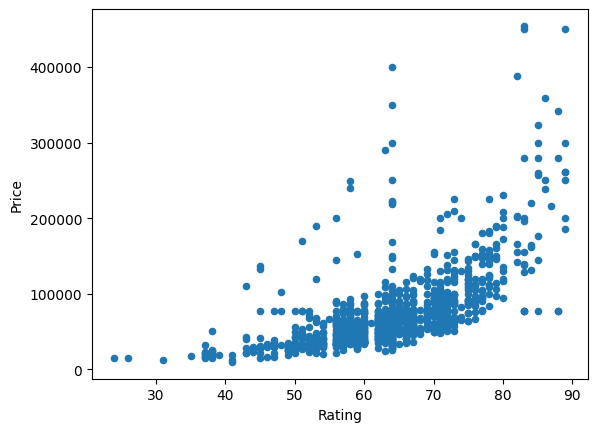

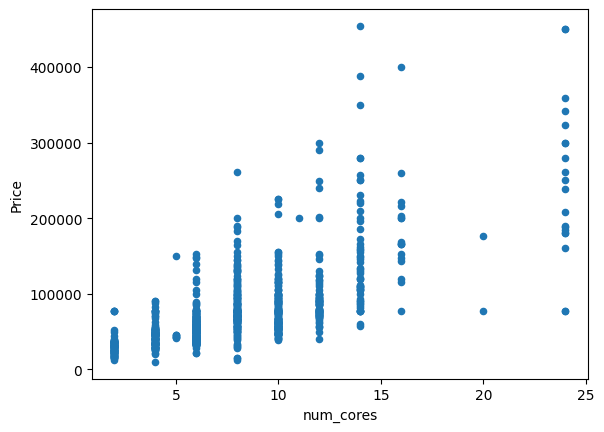

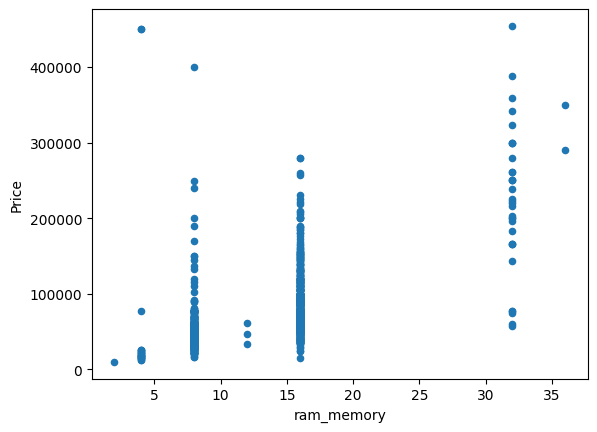

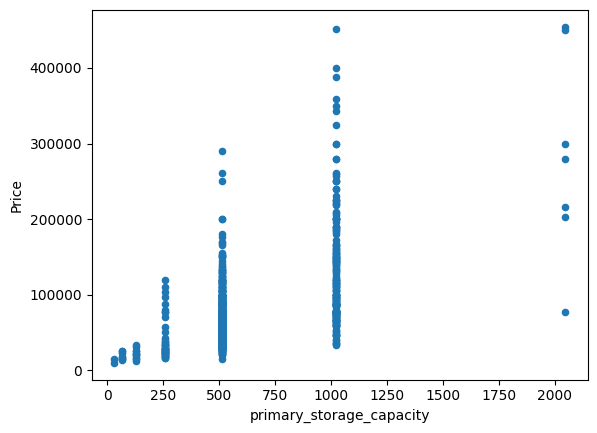

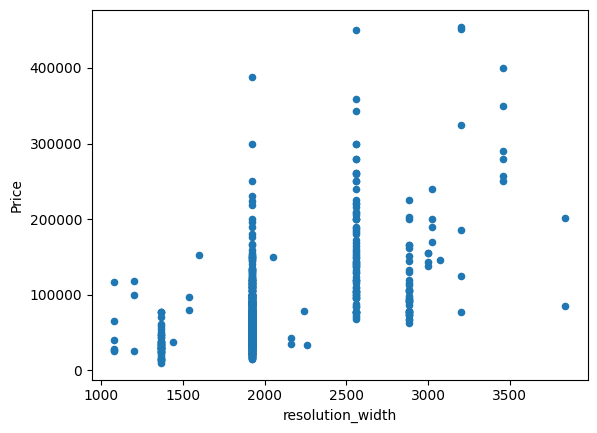

In [ ]:
laptops_info.plot(kind='scatter', x='Rating', y='Price')
laptops_info.plot(kind='scatter', x='num_cores', y='Price')
laptops_info.plot(kind='scatter', x='ram_memory', y='Price')
laptops_info.plot(kind='scatter', x='primary_storage_capacity', y='Price')
laptops_info.plot(kind='scatter', x='resolution_width', y='Price')

**Заметим, что во всех графиках присутствуют выбросы, которые могут значительно повлиять на цену ноутбука, из-за чего построенная модель может выдавать ошибки. Поэтому для построения более качественной модели можно рассмотреть по отдельности выбросы и обрабатывать их должным образом.**

# **Оценка значимости сравнительных коэффициентов. Сравнение их между собой по силе взаимосвязи с зависимой переменной.**

**Для этого построим модель со стандартизированными коэффициентами.**

In [ ]:
from scipy.stats.mstats import zscore
print(sm.OLS(zscore(y), zscore(x_mult)).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.699
Model:                            OLS   Adj. R-squared (uncentered):              0.696
Method:                 Least Squares   F-statistic:                              228.0
Date:                Tue, 12 Nov 2024   Prob (F-statistic):                   7.22e-248
Time:                        12:39:01   Log-Likelihood:                         -810.90
No. Observations:                 991   AIC:                                      1642.
Df Residuals:                     981   BIC:                                      1691.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

**Заметим, что все предикторы имеют p_value < 0.05. Это означает, что они все статистически значимы и оказывают существенное влияние на зависимую переменную "Price".**

Исходя из полученных данных, мы можем сделать следующий вывод.
---

### Оценка значимости переменных по p-value:

#### 1. **num_cores (p-value = 0.000)**
Очень значимая переменная с коэффициентом **0.315**. Это указывает на сильное влияние на цену.

#### 2. **Rating (p-value = 0.000)**
Высокозначимая переменная с коэффициентом **0.1995**. Несмотря на меньший коэффициент, по значимости она также важна.

#### 3. **primary_storage_capacity (p-value = 0.000)**
Значимая переменная с коэффициентом **0.2284**, также оказывает влияние на цену, но чуть меньшее по сравнению с количеством ядер.

#### 4. **resolution_width (p-value = 0.000)**
Значимая переменная с коэффициентом **0.1606**. Влияние есть, но оно менее выражено, чем у первых трёх переменных.

#### 5. **ram_memory (p-value = 0.000)**
Значимая переменная с коэффициентом **0.1362**. Её влияние на цену умеренное, но чуть менее значительное, чем у переменных выше.

#### 6. **OS_mac (p-value = 0.000)**
Значимая переменная с коэффициентом **0.1302**, что говорит о том, что устройства с этой ОС имеют заметно более высокую цену.

#### 7. **OS_windows (p-value = 0.000)**
Значимая переменная с отрицательным коэффициентом **−0.1629**, указывающая на снижение цены для устройств с Windows.

#### 8. **OS_dos (p-value = 0.001)**
Значимая переменная с коэффициентом **−0.1011**, также ассоциируется с более низкой ценой, но влияние менее сильное.

#### 9. **display_size (p-value = 0.011)**
Значимая переменная с коэффициентом **0.0522**, но влияние на цену слабое по сравнению с другими параметрами.

#### 10. **is_touch_screen (p-value = 0.034)**
Значимая переменная с коэффициентом **0.0411**, её влияние на цену слабое, но оно присутствует.

### Сравнение силы влияния переменных:
- **num_cores** и **primary_storage_capacity** имеют самые высокие коэффициенты, что указывает на их сильное влияние на цену. Они являются основными предикторами.
- **Rating** также имеет значительное влияние, но меньшее, чем у первых двух переменных.
- **resolution_width** и **ram_memory** оказывают умеренное влияние на цену.
- **OS_mac** и **OS_windows** имеют значительное влияние на цену, показывая разницу в стоимости между разными операционными системами. **OS_mac** увеличивает цену, а **OS_windows** и **OS_dos** снижают её.
- **display_size** и **is_touch_screen** оказывают слабое влияние на цену по сравнению с остальными переменными, но всё ещё являются значимыми.

### Выводы:
- **num_cores**, **Rating**, и **primary_storage_capacity** являются наиболее значимыми факторами, влияющими на цену.
- **OS_mac**, **OS_windows**, и **OS_dos** показывают различия в цене в зависимости от операционной системы, где **OS_mac** оказывает положительное влияние, а **OS_windows** и **OS_dos** — отрицательное.
- **display_size** и **is_touch_screen**, хотя и значимы, но их влияние на цену слабее.

Таким образом, для увеличения цены наиболее важны такие характеристики, как количество ядер, рейтинг и объём основного хранилища, а также операционная система.

# **Подробная интерпретация особенностей взаимосвязей между каждым из предикторов и зависимой переменной.**

**Подробная интерпретация каждого предиктора**
___

### 1. **const** (Константа)
   - **Коэффициент**: -140900.0
   - **Интерпретация**: Константа модели показывает базовую стоимость, которая была бы у объекта, если все предикторы равны нулю. Так как коэффициент является отрицательным, то физического смысла он не имеет, но наличие такой константы помогает учесть систематические смещения модели и помогает улучшить её точность.

### 2. **num_cores** (Количество ядер)
   - **Коэффициент**: 4224.4
   - **P-value**: 0.000 (значимый предиктор)
   - **Интерпретация**: Каждое дополнительное ядро процессора повышает стоимость ноутбука в среднем на 4224 единицы. Данный коэффициент является положительным, что логично, т.к. увеличение ядер центрального процессора положительно сказывается на производительность ноутбука.

### 3. **Rating** (Рейтинг)
   - **Коэффициент**: 1117.5
   - **P-value**: 0.000 (значимый предиктор)
   - **Интерпретация**: Повышение рейтинга на одну единицу увеличивает в среднем стоимость ноутбука на 1117.5 единиц. Данный коэффициент является положительным, что логично, ведь рейтинг ноутбука характеризует его производительность.

### 4. **primary_storage_capacity** (Объём основной памяти)
   - **Коэффициент**: 49.2
   - **P-value**: 0.000 (значимый предиктор)
   - **Интерпретация**: Каждый гигабайт увеличивает цену ноутбука в среднем на 49.2 единицы. С одной стороны увеличение на 49.2 единицы не является значимым изменением, но надо понимать, что значения primary_storage_capacity в основном принимают такие значения как 256, 512, 1024 и т.д., что уже существенно влияет на нашу переменную.

### 5. **resolution_width** (Ширина разрешения экрана)
   - **Коэффициент**: 25.5
   - **P-value**: 0.000 (значимый предиктор)
   - **Интерпретация**: Увеличение ширины экрана одну единицу в среднем увеличивает стоимость ноутбука на 25.5 единиц. Ситуация очень похожа на ситуацию с переменной "primary_storage_capacity". Увеличение на одну единицу незначимо, но базовые значения принимают большие значения, например, 1280, 1920, 2560, 3840 и т.д., что приводит к существенным изменениям в цене.

### 6. **ram_memory** (Оперативная память)
   - **Коэффициент**: 1382.4
   - **P-value**: 0.000 (значимый предиктор)
   - **Интерпретация**: Каждый дополнительный гигабайт оперативной памяти увеличивает цену устройства на 1382.4 единицы. Это влияние достаточно велико, что отражает популярность устройств с большим объёмом оперативной памяти для задач, требующих высокой производительности, таких как игры или работа с тяжёлыми приложениями.

### 7. OS (Операционная система)
**Референтной группой стала группа "other"**
### 7.1. **OS_mac** (Операционная система macOS)
   - **Коэффициент**: 61080.0
   - **P-value**: 0.000 (значимый предиктор)
   - **Интерпретация**: Переменная **OS_mac** является бинарной (принимает значение 1 для устройств с macOS). Если устройство работает на macOS, его стоимость в среднем на 61080.0 единиц выше по сравнению с устройствами на других операционных системах. Это существенное влияние отражает популярность и премиальный статус устройств Apple.

### 7.2. **OS_windows** (Операционная система Windows)
   - **Коэффициент**: -37240.0
   - **P-value**: 0.000 (значимый предиктор)
   - **Интерпретация**: Если устройство работает на Windows, его цена в среднем на 37240.0 единиц ниже по сравнению с устройствами на других ОС (предположительно, macOS и DOS). Это связано с тем, что устройства с Windows часто имеют более доступные ценовые категории по сравнению с устройствами на macOS.

### 7.3. **OS_dos** (Операционная система DOS)
   - **Коэффициент**: -32640.0
   - **P-value**: 0.001 (значимый предиктор)
   - **Интерпретация**: Если устройство работает на DOS, его цена в среднем на 32640.0 единиц ниже по сравнению с другими ОС. Этот результат отражает устаревший характер DOS и её использование на бюджетных устройствах.

### 8. **display_size** (Размер экрана)
   - **Коэффициент**: 3159.4
   - **P-value**: 0.011 (значимый предиктор)
   - **Интерпретация**: Увеличение размера экрана на 1 дюйм увеличивает стоимость устройства на 3159.4 единицы. Этот результат говорит о том, что пользователи склонны платить больше за устройства с более крупными экранами, однако значимость переменной несколько ниже, чем у других предикторов.

### 9. **is_touch_screen** (Наличие сенсорного экрана)
   - **Коэффициент**: 8215.1
   - **P-value**: 0.034 (значимо)
   - **Интерпретация**: Эта переменная также бинарная и принимает значение 1 для устройств с сенсорным экраном. Наличие сенсорного экрана увеличивает стоимость устройства на 8215.1 единиц. Этот фактор также является значимым, но его влияние не столь велико по сравнению с операционной системой или процессором.

### Вывод

- **Основные факторы, влияющие на цену**:
   - Количество ядер (**num_cores**), операционная система (**OS_mac**, **OS_windows**, **OS_dos**), рейтинг (**Rating**) и оперативная память (**ram_memory**) — все эти факторы оказывают значительное влияние на стоимость устройства.
   - Наличие сенсорного экрана и размер экрана также оказывают влияние, но их эффект слабее по сравнению с более крупными коэффициентами.

- **Особенности взаимосвязей**:
   - Операционная система сильно влияет на восприятие стоимости устройства, что видно по коэффициентам для macOS, Windows и DOS.
   - Технические характеристики, такие как процессор, рейтинг и память, оказывают прямое влияние на цену, так как пользователи всегда отдают приоритет мощным и производительным ноутбукам.
   - Переменные **resolution_width** и **primary_storage_capacity** также значимы в ценообразовании ноутбуков.

Таким образом, в модели можно выделить несколько ведущих предикторов, таких как операционная система, процессор, рейтинг и оперативная память, которые наиболее сильно влияют на цену, в то время как другие переменные также оказывают влияние, но в меньшей степени.

# **Проведение диагностики модели. Есть ли в модели выбросы и/или влияющие наблюдения? Чем это может объясняться?**

In [ ]:
influence = mult_lin_reg.get_influence()
inf_sum = influence.summary_frame()
inf_sum

,dfb_const,dfb_num_cores,dfb_Rating,dfb_primary_storage_capacity,dfb_resolution_width,dfb_ram_memory,dfb_OS_mac,dfb_OS_windows,dfb_OS_dos,dfb_display_size,dfb_is_touch_screen,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.013795,0.045750,-0.000868,0.006427,-0.006489,-0.031797,-0.002470,-0.001880,-0.000732,-0.013155,0.002721,3.059784e-04,-0.732708,0.006230,-0.058015,-0.732535,-0.058001
1,0.003907,0.092209,-0.000900,-0.103476,0.014547,-0.027646,0.001612,0.015310,0.016741,-0.009946,0.011709,1.924474e-03,-1.591972,0.008284,-0.145496,-1.593221,-0.145611
2,0.003620,0.007056,-0.025401,0.005329,0.001752,0.018954,0.001607,0.004589,0.005518,0.001419,0.003755,9.472637e-05,-0.401071,0.006436,-0.032280,-0.400900,-0.032266
3,-0.054289,-0.061606,-0.009984,0.006395,0.009680,0.052504,0.001517,-0.013249,-0.000854,0.057678,0.027528,8.582511e-04,-1.030106,0.008819,-0.097164,-1.030138,-0.097167
4,0.006392,0.011530,-0.005665,-0.000340,-0.004522,0.010913,0.000694,-0.001522,0.001321,-0.005295,0.001592,5.975777e-05,-0.458746,0.003114,-0.025639,-0.458561,-0.025628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,0.001122,0.002464,-0.001537,0.001794,0.000432,-0.002289,-0.000261,0.000150,0.000201,-0.000921,0.000532,2.291876e-06,-0.091508,0.003002,-0.005021,-0.091462,-0.005018
987,-0.000136,0.000201,0.000770,-0.000724,-0.000435,0.000159,0.000055,-0.000139,-0.000128,0.000053,-0.000188,1.795721e-07,0.023772,0.003483,0.001405,0.023760,0.001405
988,-0.002749,-0.004083,-0.000540,0.000714,0.002364,-0.003553,-0.000137,0.001473,0.000074,0.002931,-0.000335,9.714621e-06,0.189410,0.002970,0.010337,0.189317,0.010332
989,-0.009314,0.016547,-0.008216,0.009602,-0.027615,-0.004905,0.007507,-0.002588,-0.000749,0.021394,0.016215,1.541165e-04,-0.396898,0.010647,-0.041174,-0.396728,-0.041156


**Найдём потенциальные влияющие наблюдения.**

In [ ]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values()

,dffits
380,-1.441497
142,1.249823
22,1.453527
601,1.543104
608,1.999742
404,2.088413


**Найдём потенциальный выбросы.**

In [ ]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values()

,standard_resid
380,-6.878522
47,-4.948272
15,-3.727611
847,-3.574000
9,-3.083137
807,3.379093
369,3.523622
619,3.764370
316,3.869603
340,4.277141


**Изобразим график остатков модели против предсказанных значений.**

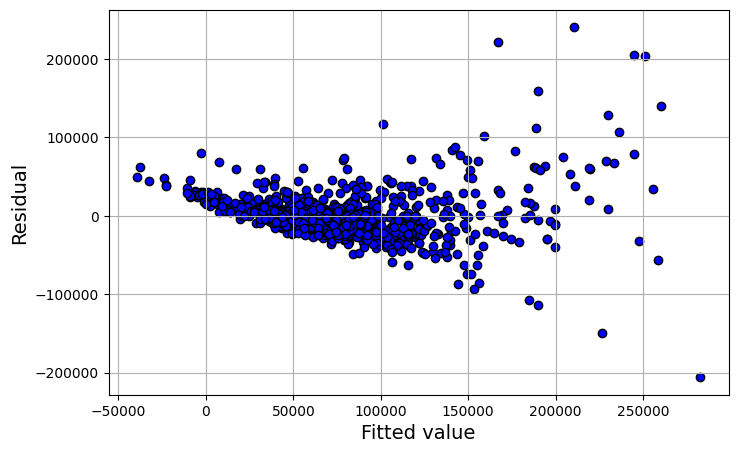

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(x=mult_lin_reg.fittedvalues, y=mult_lin_reg.resid, color='blue', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted value', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.show()

**Заметим, что график принимает вид своеобразного веера, что указывает нам на наличие гетероскедастичности.**

**Проверим также на мультиколлинеарность.**

In [ ]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vifs = np.array([vif(mult_lin_reg.model.exog, i) for i in range(mult_lin_reg.model.exog.shape[1])])
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = mult_lin_reg.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
9,1.220805,is_touch_screen
8,1.356209,display_size
2,1.612794,primary_storage_capacity
3,1.646384,resolution_width
0,1.801146,num_cores
4,1.872472,ram_memory
5,1.972027,OS_mac
1,2.479860,Rating
7,2.807769,OS_dos
6,3.944662,OS_windows


**Заметим, что нет значений VIF, которые превышали бы 10, следовательно проблема мультиколлениарности отсутствует.**

**Исходя из проведенного выше анализа, мы можем сделать следующий вывод, что наличие выбросов и влиятельных наблюдений выражается в гетероскедастичности, так как по графику можно увидеть, что для некоторых значений переменных влияние наблюдений будет более значительным, создавая выбросы и влиятельные точки.**

**Также в наборе данных могут быть редкие или уникальные устройства, которые значительно отличаются по цене и характеристикам от остальных. Эти ноутбуки могут иметь крайне высокую или низкую цену, что делает их выбросами или влиятельными наблюдениями. Мы можем это наблюдать на scatter графиках в разделе "Оценка характеристик регрессионной модели", где отчетливо видны значения с высокими или низкими ценами, которые будут сильно выражены в виде отдельных точек.**

# **Выводы по гипотезам**

**Гипотеза 1: Линейная зависимость**

Между зависимой переменной и предикторами действительно существует линейная зависимость, которая выражается таким уравнением:

 **Y(*Price*) = -140873.365198 + 4224.44*num_cores* + 1117.48*Rating* + 49.20*primary_storage_capacity* + 25.50*resolution_width* + 1382.43*ram_memory* + 61081.83*OS_mac* + -37235.82*OS_windows* + -32642.58*OS_dos* + 3159.35*display_size* + 8215.05*is_touch_screen***

Следовательно мы принимаем гипотезу H0.
___
**Гипотеза 2: Независимость предикторов.**

Ранее мы расчитали VIF знаение для каждого предиктора:

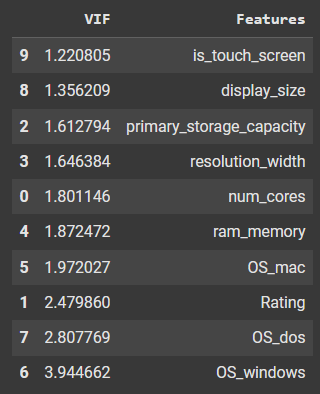

**Исходя из полученных данных, мы можем сделать вывод, что предикторы не коррелируют между собой на высоком уровне, а также у всех независимых переменных значение VIF меньше 10.**

Следовательно мы принимаем гипотезу A0.
___

**Гипотеза 3: Отсутствие мультиколлинеарности**



**Построим для этого хитмап матрицы корреляций.**

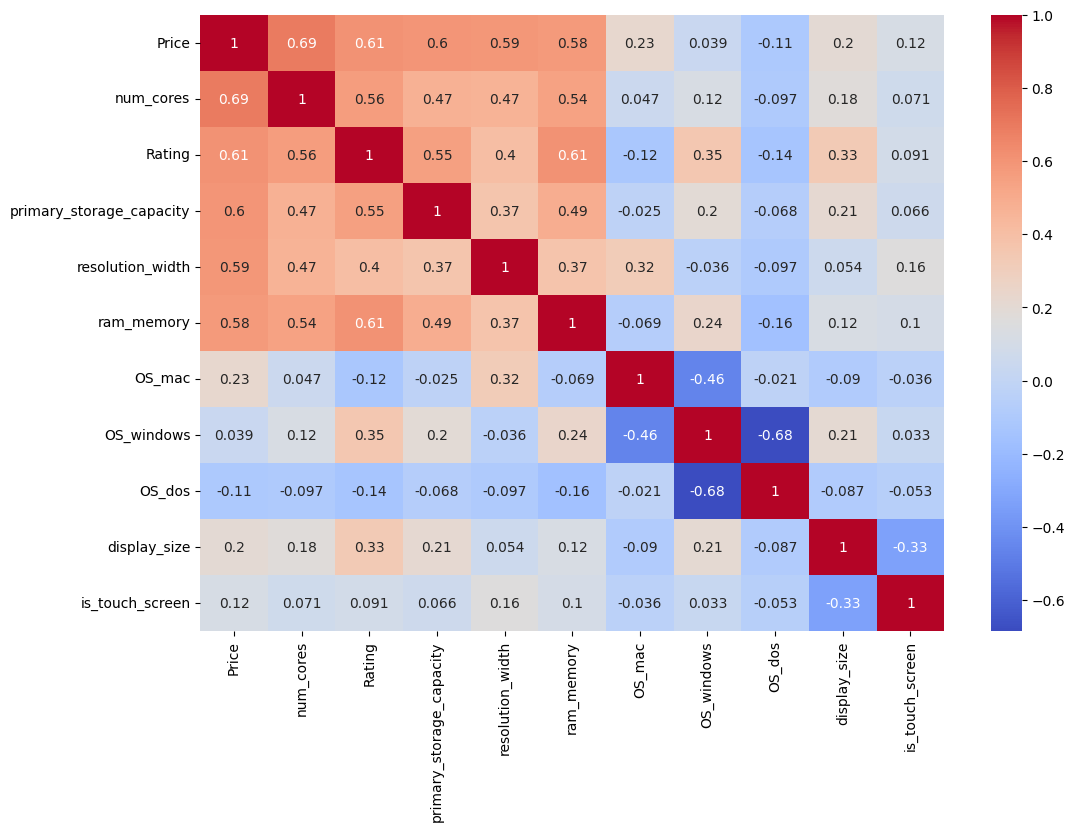

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(mult_lin_reg_val.corr(), annot=True, cmap='coolwarm')
plt.show()


**Исходя из графика, мы можем заметить, что
 между переменными корреляция не превосходит 0.75, что достаточно для принятии гипотезы B0.**

___
**Гипотеза 4: Гомоскедастичность.**

Ранее мы уже строили график остаков модели против предсказанных значений.

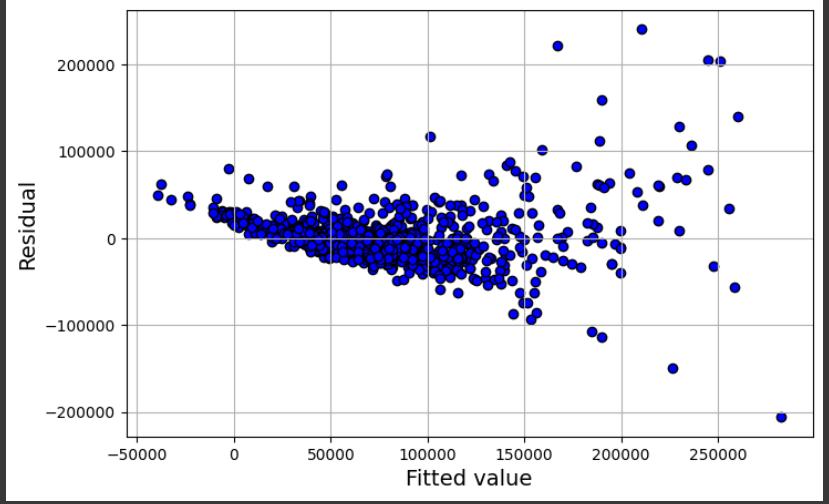

**Мы можем наблюдать, что график принимает веерообразную форму, а также отчетливо видны выбросы, что свидетельствует о гетероскедастичности.**

Следовательно мы принимаем гипотезу C1.
___

**Гипотеза 5: Нормальность распределения ошибок**

Построим для этого график.

<ipython-input-36-7a2e538e82a2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mult_lin_reg.resid, fit=stats.norm)


<Axes: ylabel='Density'>

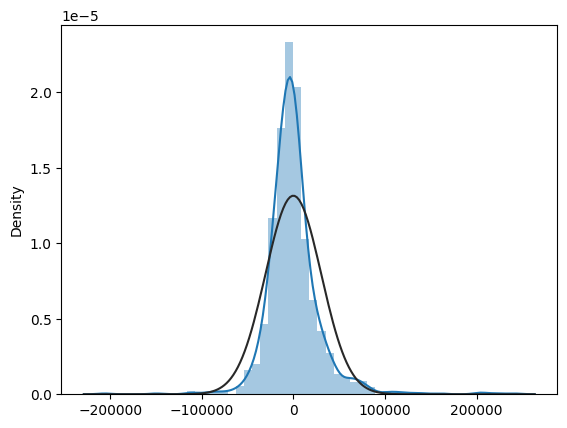

In [ ]:
from scipy import stats

sns.distplot(mult_lin_reg.resid, fit=stats.norm)

**Исходя из графика, мы можем заметить, гистограмма плотности имеет симметричную форму, что указывает на центральную тенденцию около нуля. Однако можно заметить, что пики плотности (синие столбики) чуть острее, чем у нормального распределения (черная линия). Это может указывать на "узкий" центр, то есть в областях, которые находятся дальше от среднего значения, находится больше данных, чем у нормального.**

Следовательно мы принимаем гнипотезу D1.
___

**Гипотеза 6: Отсутстиве автокорреляции ошибок.**

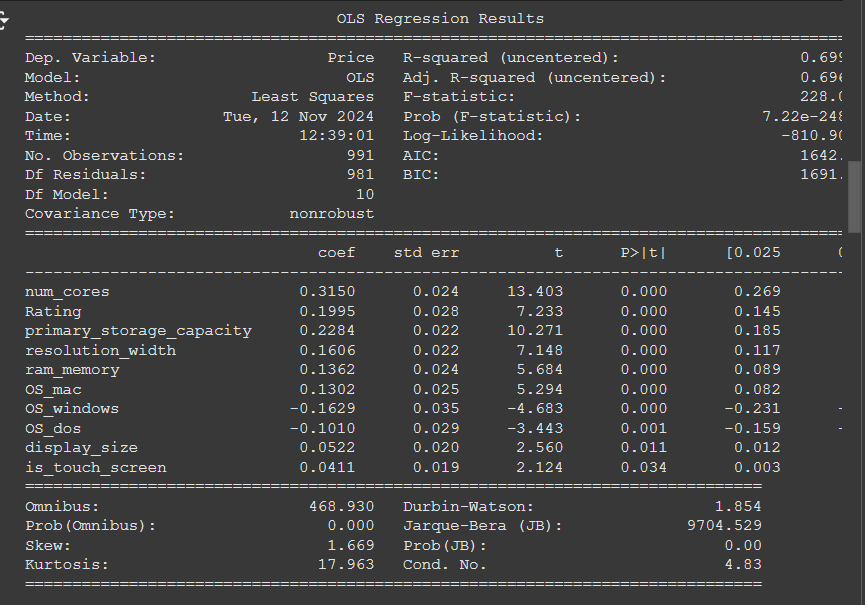

**Рассмотрим индекс Дарбина-Ватсона. Так как он принимаем значение в диапазоне от 1 до 2, то автокорреляция ошибок отсутствует.**

Следовательно принимаем гипотезу E0.

# **Общий вывод после проведения анализа**

**Проведённый анализ показал, что наиболее важными факторами, определяющими цену устройства, являются его производительность, рейтинг и операционная система. Переменные, связанные с экраном, также имеют значение, но их влияние менее выражено. Модель показала себя значимой, но требует корректировки для учёта возможной гетероскедастичности и влияния выбросов.**

**Проведённый множественный регрессионный анализ подтвердил мои ожидания о существовании линейной зависимости между ценой устройства и его характеристиками, такими как количество ядер, рейтинг, объём памяти и операционная система, которые оказались значимыми предикторами. Все переменные независимы друг от друга (значения VIF ниже 10), а корреляции не превышают 0.75, что исключает проблему мультиколлинеарности. Анализ остатков выявил гетероскедастичность: график остатков против предсказанных значений продемонстрировал веерообразное распределение, что указывает на изменяющуюся дисперсию ошибок. Гистограмма остатков показала симметричное распределение вокруг нуля, хотя и с более острым пиком, чем у нормального распределения, что может указывать на небольшие отклонения от нормальности. Автокорреляции ошибок нет, что подтверждено значением индекса Дарбина-Ватсона. В целом модель демонстрирует ожидаемую объяснительную силу и точность, остаётся лишь поработать над выбросами и гетероскедастичностью, чтобы улучшить её надёжность.**
